In [5]:
import xml.etree.ElementTree as ET

class PDBTM:
    def __init__(self, id = str, chains = []): 
        self.id = id
        self.chains = chains
    
class Chain:
    def __init__(self, id = str, num_tm = int, typ = str, seq = str, regions = []): 
        self.id = id
        self.num_tm = num_tm
        self.typ = typ
        self.seq = seq
        self.regions = regions
    
class Region:
    def __init__(self, seq_beg = int, pdb_beg = int, seq_end = int, pdb_end = int, typ = str):
        self.seq_beg = seq_beg
        self.pdb_beg = pdb_beg
        self.seq_end = seq_end
        self.pdb_end = pdb_end
        self.typ = typ

In [6]:
import os
from shutil import copyfile

def filter_for_tmps(path):
    counter = 0
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.endswith(".xml"): 
                path = os.path.join(root,name)
                pdbtm_xml = ET.parse(path) 
                pdbtm_root = pdbtm_xml.getroot()
                is_tmp = pdbtm_root.attrib.get('TMP')
                if is_tmp == 'yes':
                    print("Copy", pdbtm_root.attrib.get("ID"))
                    copyfile(path, os.path.join("pdbtm_xmls",name))
                    counter = counter + 1
                        
    return counter
                
#number_of_tms = filter_for_tmps("pdbtm/database")    
#print(number_of_tms)

In [7]:
def parse_pdbtm_xmls(paths):
    '''
    Parses PDBTM XML files to a list od PDBTM Objects.
    A PDBTM Object contains the PDB ID as well as a list of Chain objects. 
    A Chain Object contains the chain ID, the tm number, the type, the sequence and a list of Region objects.
    A Region object contains the begin and end indices of the sequence and the pdb file, as well as the type.
    '''
    ns = {'pdbtm': 'http://pdbtm.enzim.hu'}
    pdbtms = []
    for path in paths:
        pdbtm_xml = ET.parse(path) 
        pdbtm_root = pdbtm_xml.getroot()
        pdbtm_id = pdbtm_root.attrib.get('ID')
        
        if pdbtm_root.attrib.get('TMP') == 'yes':
            chains = []
            for chain_xml in pdbtm_root.findall('pdbtm:CHAIN', ns):
                chain_id = chain_xml.attrib.get('CHAINID')
                num_tm = chain_xml.attrib.get('NUM_TM')
                typ = chain_xml.attrib.get('TYPE')
                seq = chain_xml.find('pdbtm:SEQ', ns)

                regions = []
                for region_xml in chain_xml.findall('pdbtm:REGION', ns):
                    seq_beg = region_xml.attrib.get('seq_beg')
                    pdb_beg = region_xml.attrib.get('pdb_beg')
                    seq_end = region_xml.attrib.get('seq_end')
                    pdb_end = region_xml.attrib.get('pdb_end')
                    typ_region = region_xml.attrib.get('type')
                    region = Region(seq_beg, pdb_beg, seq_end, pdb_end, typ_region)
                    regions.append(region)
            chain = Chain(chain_id, num_tm, typ, seq.text.replace(" ", "").replace("\n", ""), regions)
            chains.append(chain) 

            pdbtm = PDBTM(pdbtm_id, chains)
            pdbtms.append(pdbtm)
        
        else:
            print(pdbtm_id, "is no TMP and was ignored.")
    
    return pdbtms

In [8]:
paths = []
for file in os.listdir("pdbtm_xmls"):
    if file.endswith(".xml"):
        path = os.path.join("pdbtm_xmls", file)
        paths.append(path.strip())
        
pdbtms = parse_pdbtm_xmls(paths)

In [9]:
helix_pdbtms = []
for pdbtm in pdbtms:
    for chain in pdbtm.chains:
        if chain.typ == "alpha":
            for region in chain.regions:
                if region.typ == "H":
                    helix = chain.seq[int(region.seq_beg):int(region.seq_end)]
                    helix_pdbtms.append(helix)

In [10]:
import collections
pdbtm_helices_aas = collections.Counter()
for helix in helix_pdbtms:
    pdbtm_helices_aas = pdbtm_helices_aas + collections.Counter(helix)

<function matplotlib.pyplot.show(*args, **kw)>

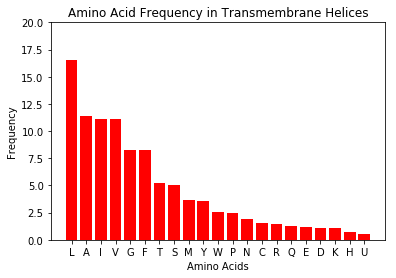

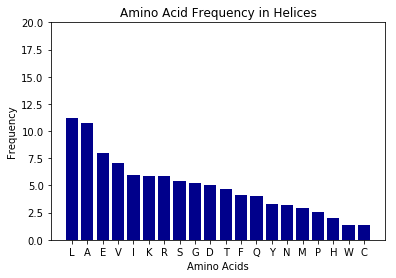

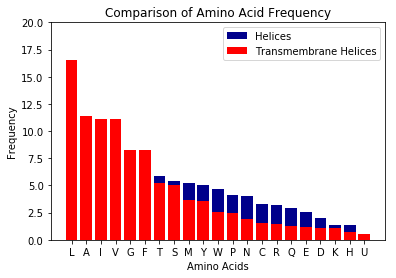

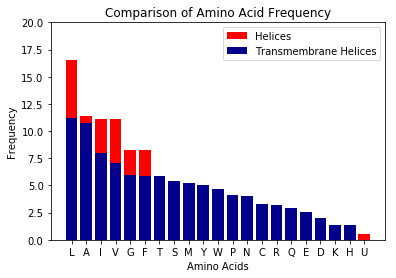

In [47]:
import matplotlib.pyplot as plt
import operator

#number_of_aas = 0
#for key in pdbtm_helices_aas.keys():
#    number_of_aas = number_of_aas + pdbtm_helices_aas.get(key)
    
#percentage = {}
#for key in pdbtm_helices_aas.keys():
#    percentage[key] = round(pdbtm_helices_aas.get(key)/number_of_aas*100,2)

amino_acids_tm_helices = {
    'L': 16.52,
    'A': 11.39,
    'I': 11.14,
    'V': 11.12,
    'G': 8.3,
    'F': 8.27,
    'T': 5.21,
    'S': 5.0,
    'M': 3.66,
    'Y': 3.59,
    'W': 2.55,
    'P': 2.48,
    'N': 1.91,
    'C': 1.51,
    'R': 1.48,
    'Q': 1.23,
    'E': 1.21,
    'D': 1.09,
    'K': 1.08,
    'H': 0.7,
    'U': 0.55}

f1 = plt.figure()
plt.bar(range(len(amino_acids_tm_helices)), list(amino_acids_tm_helices.values()), align='center', color='red')
plt.title("Amino Acid Frequency in Transmembrane Helices")
plt.xticks(range(len(amino_acids_tm_helices)), list(amino_acids_tm_helices.keys()))
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
f1.savefig('aa_tm_helix_frequency.pdf')
plt.ylim([0,20])
plt.show   

amino_acids_helices = {
    "L" : 11.2,
    "A" : 10.7,
    "E" : 8.0,
    "V" : 7.1,
    "I" : 6.0,
    "K" : 5.9,
    "R" : 5.9,
    "S" : 5.4,
    "G" : 5.2,
    "D" : 5.0,
    "T" : 4.7,
    "F" : 4.1,
    "Q" : 4.0,
    "Y" : 3.3,
    "N" : 3.2,
    "M" : 2.9,
    "P" : 2.6,
    "H" : 2.0,
    "W" : 1.4,
    "C" : 1.4
} 

f2 = plt.figure()
plt.bar(range(len(amino_acids_helices)), list(amino_acids_helices.values()), align='center', color='darkblue')
plt.title("Amino Acid Frequency in Helices")
plt.xticks(range(len(amino_acids_helices)), list(amino_acids_helices.keys()))
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
plt.ylim([0,20])
f2.savefig('aa_helix_frequency.pdf')
plt.show   

f3 = plt.figure()
plt.bar(range(len(amino_acids_helices)), list(amino_acids_helices.values()), align='center', color='darkblue')
plt.bar(range(len(amino_acids_tm_helices)), list(amino_acids_tm_helices.values()), align='center', color='red')
plt.xticks(range(len(amino_acids_tm_helices)), list(amino_acids_tm_helices.keys()))
plt.title("Comparison of Amino Acid Frequency")
plt.legend(["Helices", "Transmembrane Helices"])
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
plt.ylim([0,20])
f3.savefig('comparison_tm_back.pdf')
plt.show  

f4 = plt.figure()
plt.bar(range(len(amino_acids_tm_helices)), list(amino_acids_tm_helices.values()), align='center', color='red')
plt.bar(range(len(amino_acids_helices)), list(amino_acids_helices.values()), align='center', color='darkblue')
plt.xticks(range(len(amino_acids_tm_helices)), list(amino_acids_tm_helices.keys()))
plt.title("Comparison of Amino Acid Frequency")
plt.legend(["Helices", "Transmembrane Helices"])
plt.xlabel("Amino Acids")
plt.ylabel("Frequency")
plt.ylim([0,20])
f4.savefig(figures'comparison_tm_front.pdf')
plt.show  